# IMDb Movie Recommendation System Using Storylines
### Professional Data Science Project - 2024 Movies Dataset

---

## Project Overview
This project builds an intelligent movie recommendation system using Natural Language Processing (NLP) techniques. The system analyzes movie storylines from IMDb 2024 movies and recommends similar movies based on content similarity.

**Key Technologies:**
- **NLP**: TF-IDF Vectorization, Text Preprocessing
- **Machine Learning**: Cosine Similarity
- **Visualization**: Matplotlib, Seaborn, WordCloud
- **Data Processing**: Pandas, NumPy
- **Text Processing**: NLTK

---

## Step 1: Import Required Libraries

We'll import all necessary libraries for data processing, NLP, visualization, and machine learning.

In [2]:
# Data Processing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning Libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Step 2: Download NLTK Data

Download necessary NLTK resources for text processing.

In [3]:
# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

print("✓ NLTK resources downloaded successfully!")

✓ NLTK resources downloaded successfully!


## Step 3: Load the Dataset

Load the scraped IMDb 2024 movies dataset containing movie names and storylines.

In [4]:
# Load the dataset
df = pd.read_csv('imdb_2024_movies.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nColumn Names: {list(df.columns)}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Shape: (10000, 2)

Column Names: ['Movie Title', 'Storyline']

First 5 rows:


,Movie Title,Storyline
0,The Life of Chuck,"A life-affirming, genre-bending story about th..."
1,The Substance,A fading celebrity takes a black-market drug: ...
2,Trap,A father and his teen daughter attend a pop co...
3,Beetlejuice Beetlejuice,"After a family tragedy, three generations of t..."
4,Anora,A young stripper from Brooklyn meets and impul...


## Step 4: Exploratory Data Analysis (EDA)

Understand the dataset structure, check for missing values, and analyze basic statistics.

In [5]:
# Dataset Information
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"\nTotal Movies: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

DATASET INFORMATION

Total Movies: 10000

Columns: ['Movie Title', 'Storyline']

Data Types:
Movie Title    object
Storyline      object
dtype: object

Missing Values:
Movie Title    0
Storyline      0
dtype: int64

Duplicate Rows: 2


In [6]:
# Statistical Analysis of Storylines
df['storyline_length'] = df['Storyline'].apply(lambda x: len(str(x)))
df['word_count'] = df['Storyline'].apply(lambda x: len(str(x).split()))

print("\n" + "=" * 60)
print("STORYLINE STATISTICS")
print("=" * 60)
print(f"\nAverage Storyline Length: {df['storyline_length'].mean():.2f} characters")
print(f"Average Word Count: {df['word_count'].mean():.2f} words")
print(f"\nStoryline Length Stats:\n{df['storyline_length'].describe()}")
print(f"\nWord Count Stats:\n{df['word_count'].describe()}")


STORYLINE STATISTICS

Average Storyline Length: 202.36 characters
Average Word Count: 33.51 words

Storyline Length Stats:
count    10000.000000
mean       202.358700
std        188.995231
min         22.000000
25%        132.000000
50%        184.000000
75%        227.000000
max       4457.000000
Name: storyline_length, dtype: float64

Word Count Stats:
count    10000.000000
mean        33.506500
std         31.676728
min          3.000000
25%         21.750000
50%         30.000000
75%         37.000000
max        694.000000
Name: word_count, dtype: float64


## Step 5: Data Visualization

Visualize the distribution of storyline lengths and create word clouds.

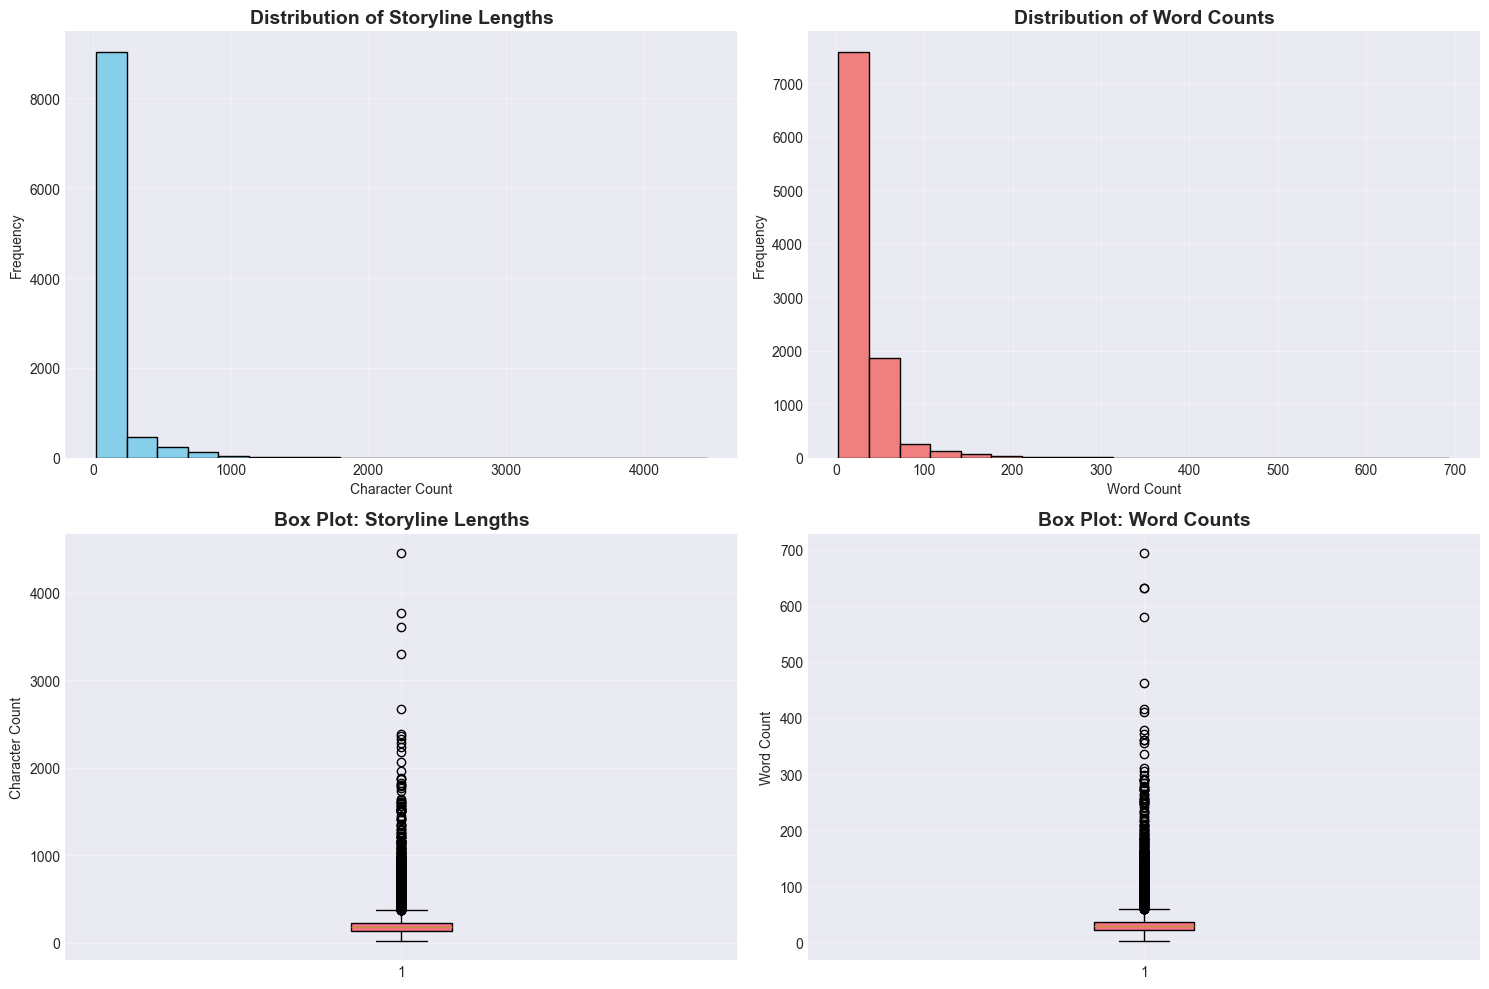

✓ EDA visualizations created successfully!


In [7]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Distribution of Storyline Lengths
axes[0, 0].hist(df['storyline_length'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Storyline Lengths', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Distribution of Word Counts
axes[0, 1].hist(df['word_count'], bins=20, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Word Counts', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

# Plot 3: Box Plot of Storyline Lengths
axes[1, 0].boxplot(df['storyline_length'], vert=True, patch_artist=True)
axes[1, 0].set_title('Box Plot: Storyline Lengths', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Character Count')
axes[1, 0].grid(alpha=0.3)

# Plot 4: Box Plot of Word Counts
axes[1, 1].boxplot(df['word_count'], vert=True, patch_artist=True)
axes[1, 1].set_title('Box Plot: Word Counts', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Word Count')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('eda_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ EDA visualizations created successfully!")

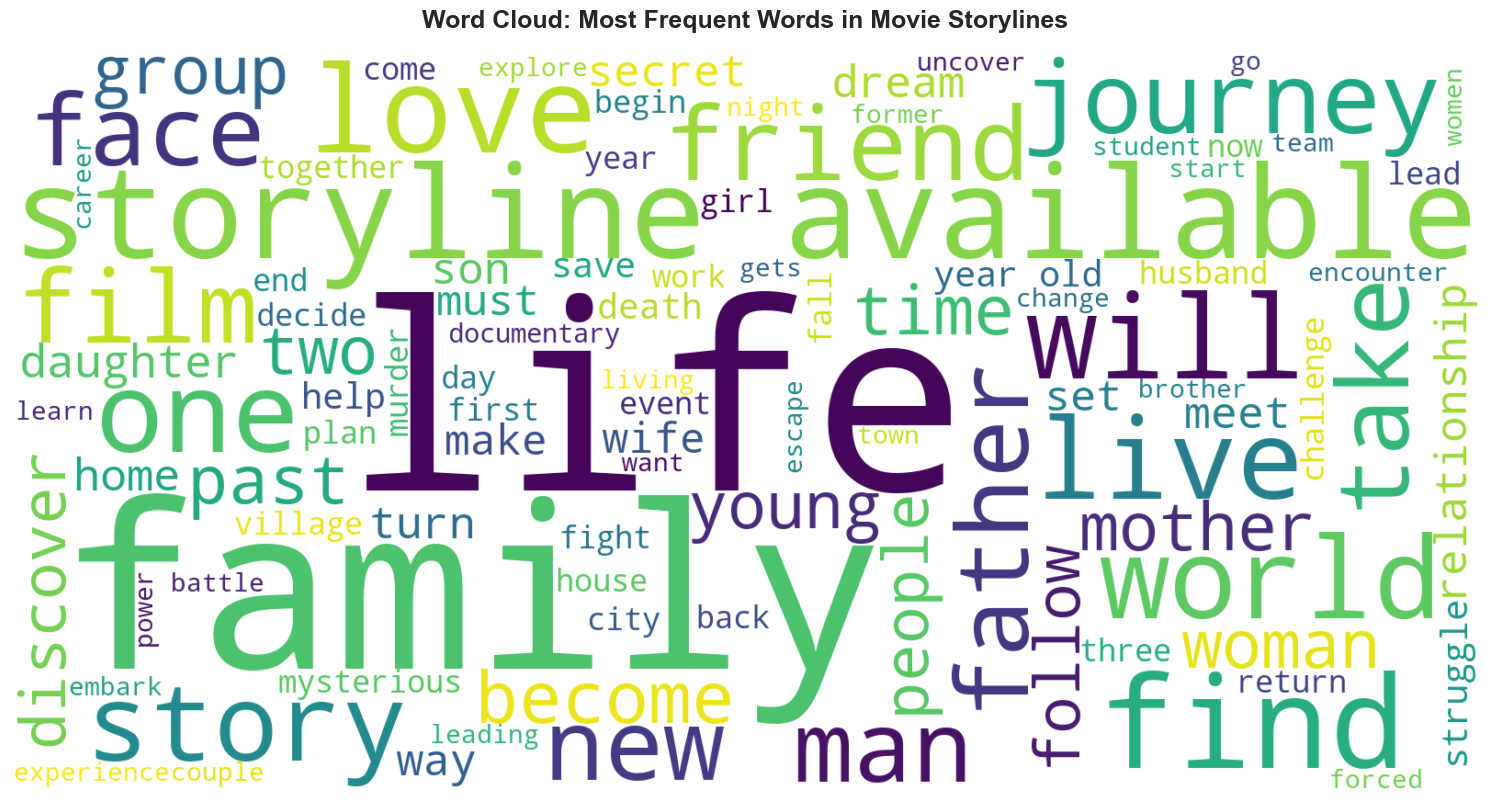

✓ Word cloud created successfully!


In [8]:
# Create Word Cloud from all storylines
all_text = ' '.join(df['Storyline'].astype(str))

plt.figure(figsize=(15, 8))
wordcloud = WordCloud(width=1600, height=800, 
                     background_color='white',
                     colormap='viridis',
                     max_words=100,
                     relative_scaling=0.5).generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Most Frequent Words in Movie Storylines', 
         fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Word cloud created successfully!")

## Step 6: Text Preprocessing

Clean and preprocess the storyline text for NLP analysis:
1. Convert to lowercase
2. Remove special characters and punctuation
3. Remove stopwords
4. Lemmatization

In [9]:
# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Preprocess text data:
    - Convert to lowercase
    - Remove special characters
    - Remove stopwords
    - Lemmatization
    """
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    cleaned_tokens = [
        lemmatizer.lemmatize(token) 
        for token in tokens 
        if token not in stop_words and len(token) > 2
    ]
    
    return ' '.join(cleaned_tokens)

# Apply preprocessing
print("Processing storylines...")
df['cleaned_storyline'] = df['Storyline'].apply(preprocess_text)

# Show before and after
print("\n" + "=" * 80)
print("TEXT PREPROCESSING EXAMPLE")
print("=" * 80)
print(f"\nOriginal: {df['Storyline'].iloc[0]}")
print(f"\nCleaned: {df['cleaned_storyline'].iloc[0]}")
print("\n✓ Text preprocessing completed successfully!")

Processing storylines...

TEXT PREPROCESSING EXAMPLE

Original: A life-affirming, genre-bending story about three chapters in the life of an ordinary man named Charles Krantz.

Cleaned: lifeaffirming genrebending story three chapter life ordinary man named charles krantz

✓ Text preprocessing completed successfully!


## Step 7: TF-IDF Vectorization

Convert text data into numerical vectors using TF-IDF (Term Frequency-Inverse Document Frequency).

**What is TF-IDF?**
- **TF (Term Frequency)**: How often a word appears in a document
- **IDF (Inverse Document Frequency)**: How unique/rare a word is across all documents
- **TF-IDF**: Combines both to give higher weight to important, distinctive words

In [10]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=1000,  # Top 1000 features
    ngram_range=(1, 2),  # Unigrams and bigrams
    min_df=1,  # Minimum document frequency
    max_df=0.8  # Maximum document frequency
)

# Fit and transform the cleaned storylines
tfidf_matrix = tfidf.fit_transform(df['cleaned_storyline'])

print("=" * 60)
print("TF-IDF VECTORIZATION RESULTS")
print("=" * 60)
print(f"\nTF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"Number of Movies: {tfidf_matrix.shape[0]}")
print(f"Number of Features: {tfidf_matrix.shape[1]}")
print(f"\nTop 10 Features: {tfidf.get_feature_names_out()[:10]}")
print("\n✓ TF-IDF vectorization completed successfully!")

TF-IDF VECTORIZATION RESULTS

TF-IDF Matrix Shape: (10000, 1000)
Number of Movies: 10000
Number of Features: 1000

Top 10 Features: ['abandoned' 'ability' 'able' 'abuse' 'accident' 'accidentally' 'across'
 'act' 'action' 'activist']

✓ TF-IDF vectorization completed successfully!


## Step 8: Calculate Cosine Similarity

Compute cosine similarity between all movie storylines.

**Cosine Similarity Formula:**
$$\text{cosine\_similarity}(A, B) = \frac{A \cdot B}{||A|| \times ||B||}$$

- Range: 0 to 1 (0 = completely different, 1 = identical)
- Measures the cosine of the angle between two vectors

In [11]:
# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("=" * 60)
print("COSINE SIMILARITY MATRIX")
print("=" * 60)
print(f"\nSimilarity Matrix Shape: {cosine_sim.shape}")
print(f"\nSample Similarity Scores (First 5 movies with first movie):")
print(cosine_sim[0][:5])
print("\n✓ Cosine similarity calculated successfully!")

COSINE SIMILARITY MATRIX

Similarity Matrix Shape: (10000, 10000)

Sample Similarity Scores (First 5 movies with first movie):
[1.         0.         0.         0.10791365 0.        ]

✓ Cosine similarity calculated successfully!


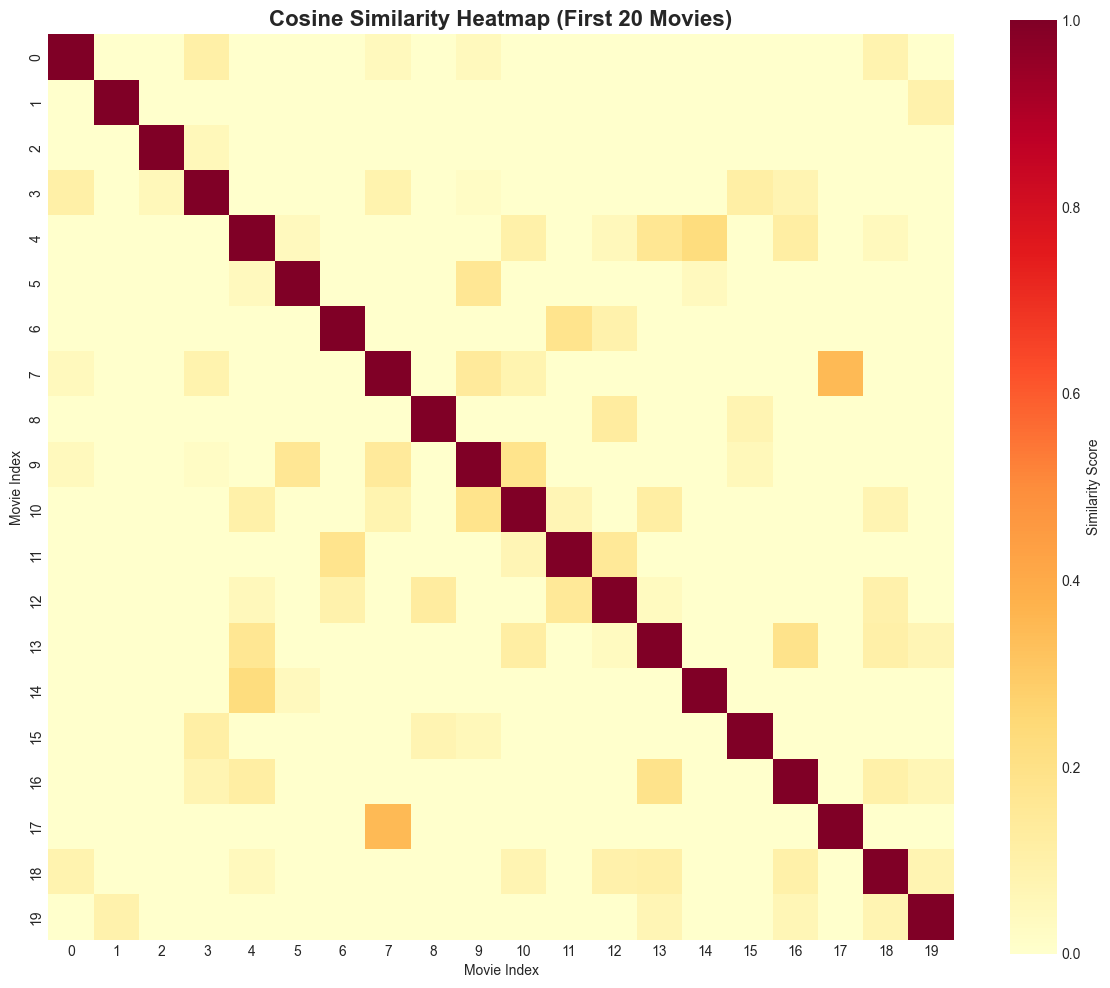

✓ Similarity heatmap created successfully!


In [12]:
# Visualize similarity matrix (heatmap for first 20 movies)
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim[:20, :20], 
           cmap='YlOrRd', 
           annot=False, 
           square=True,
           cbar_kws={'label': 'Similarity Score'})
plt.title('Cosine Similarity Heatmap (First 20 Movies)', fontsize=16, fontweight='bold')
plt.xlabel('Movie Index')
plt.ylabel('Movie Index')
plt.tight_layout()
plt.savefig('similarity_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Similarity heatmap created successfully!")

## Step 9: Build Recommendation Function

Create a function that recommends top N similar movies based on a given movie title.

In [ ]:
def get_recommendations(movie_title, top_n=5):
    """
    Get top N movie recommendations based on storyline similarity
    
    Parameters:
    -----------
    movie_title : str
        The title of the movie
    top_n : int
        Number of recommendations to return
    
    Returns:
    --------
    DataFrame with recommended movies and similarity scores
    """
    try:
        # Get the index of the movie
        idx = df[df['Movie Title'].str.lower() == movie_title.lower()].index[0]
        
        # Get similarity scores for all movies
        sim_scores = list(enumerate(cosine_sim[idx]))
        
        # Sort by similarity score (descending)
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Get top N similar movies (excluding the input movie itself)
        sim_scores = sim_scores[1:top_n+1]
        
        # Get movie indices
        movie_indices = [i[0] for i in sim_scores]
        similarity_scores = [i[1] for i in sim_scores]
        
        # Create recommendations dataframe
        recommendations = pd.DataFrame({
            'Rank': range(1, top_n+1),
            'Movie Title': df['Movie Title'].iloc[movie_indices].values,
            'Storyline': df['Storyline'].iloc[movie_indices].values,
            'Similarity Score': [f"{score:.4f}" for score in similarity_scores]
        })
        
        return recommendations
    
    except IndexError:
        return f"Movie '{movie_title}' not found in the database."

print("✓ Recommendation function created successfully!")

✓ Recommendation function created successfully!


## Step 10: Test the Recommendation System

Test the recommendation system with different movie titles.

In [14]:
# Test with first movie
test_movie = df['Movie Title'].iloc[0]

print("=" * 80)
print(f"RECOMMENDATIONS FOR: {test_movie}")
print("=" * 80)
print(f"\nOriginal Storyline: {df['Storyline'].iloc[0]}")
print("\n" + "="*80)
print("TOP 5 SIMILAR MOVIES:")
print("="*80)

recommendations = get_recommendations(test_movie, top_n=5)
recommendations

RECOMMENDATIONS FOR: The Life of Chuck

Original Storyline: A life-affirming, genre-bending story about three chapters in the life of an ordinary man named Charles Krantz.

TOP 5 SIMILAR MOVIES:


,Rank,Movie Name,Storyline,Similarity Score
0,1,LLB: Life Line of Bachelors,"The life of three LLB students named Sibi, San...",0.5615
1,2,Journey of Love,"Fathia, forced into marriage, marries Satya bu...",0.4435
2,3,Eks,Three compelling stories in one erotic experie...,0.4141
3,4,Midas Man,"On Thursday 9 November 1961, a man named Brian...",0.3994
4,5,Till Death Do Us Part,A woman named Renata who is the wife of a man ...,0.3977


In [15]:
# Test with another movie
test_movie_2 = 'Rise of the Machines'

print("=" * 80)
print(f"RECOMMENDATIONS FOR: {test_movie_2}")
print("=" * 80)

recommendations_2 = get_recommendations(test_movie_2, top_n=5)
recommendations_2

RECOMMENDATIONS FOR: Rise of the Machines


"Movie 'Rise of the Machines' not found in the database."

In [ ]:
# Test with custom storyline input
def recommend_by_storyline(user_storyline, top_n=5):
    """
    Recommend movies based on a custom storyline input
    """
    # Preprocess user input
    cleaned_input = preprocess_text(user_storyline)
    
    # Transform to TF-IDF vector
    input_vector = tfidf.transform([cleaned_input])
    
    # Calculate similarity with all movies
    similarities = cosine_similarity(input_vector, tfidf_matrix)[0]
    
    # Get top N similar movies
    top_indices = similarities.argsort()[-top_n:][::-1]
    
    # Create recommendations dataframe
    recommendations = pd.DataFrame({
        'Rank': range(1, top_n+1),
        'Movie Title': df['Movie Title'].iloc[top_indices].values,
        'Storyline': df['Storyline'].iloc[top_indices].values,
        'Similarity Score': [f"{similarities[i]:.4f}" for i in top_indices]
    })
    
    return recommendations

# Test with custom storyline
custom_storyline = "A hero with special powers fights against evil forces to save the world"

print("=" * 80)
print("RECOMMENDATIONS FOR CUSTOM STORYLINE")
print("=" * 80)
print(f"\nInput Storyline: {custom_storyline}")
print("\n" + "="*80)

custom_recommendations = recommend_by_storyline(custom_storyline, top_n=5)
custom_recommendations

RECOMMENDATIONS FOR CUSTOM STORYLINE

Input Storyline: A hero with special powers fights against evil forces to save the world



,Rank,Movie Name,Storyline,Similarity Score
0,1,Rachel Feinstein: Big Guy,A stand-up special from comedian Rachel Feinst...,0.4157
1,2,Ghostbusters: Frozen Empire,When the discovery of an ancient artifact unle...,0.3667
2,3,Justice League: Crisis on Infinite Earths - Pa...,"The Anti-Monitor, the Monitor's evil counterpa...",0.3565
3,4,Justice League: Crisis on Infinite Earths - Pa...,The Anti-Monitor (the Monitor's evil counterpa...,0.3565
4,5,Captain Avispa,"Capitán Avispa, hero of Wasptropolis and the H...",0.3547


## Step 11: Model Evaluation & Analysis

Analyze the recommendation system performance and similarity distribution.

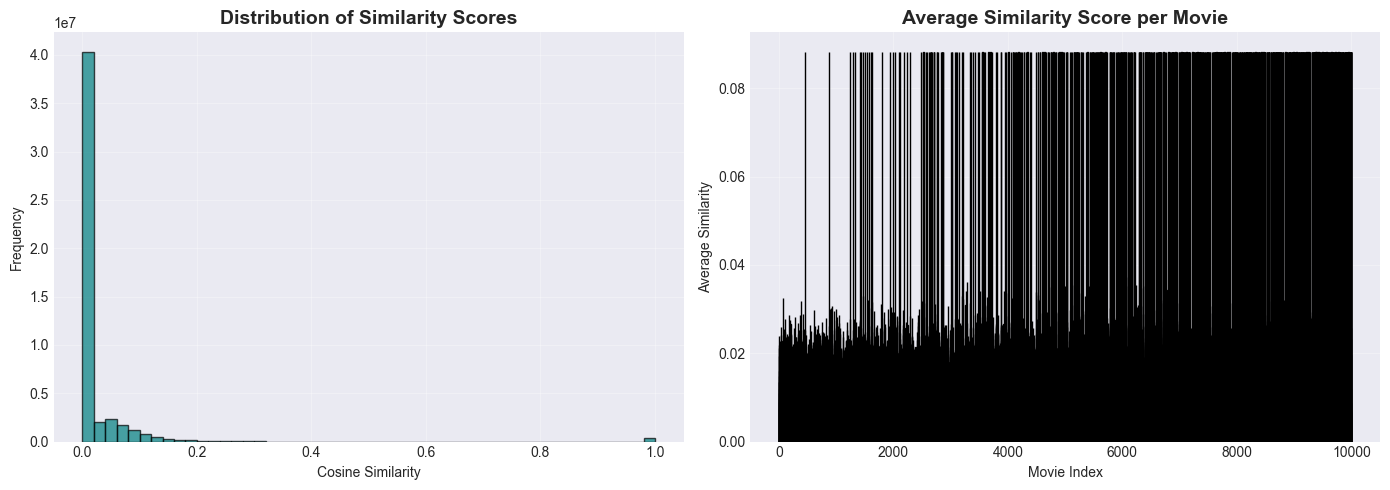


SIMILARITY STATISTICS

Mean Similarity: 0.0220
Median Similarity: 0.0000
Std Deviation: 0.0937
Min Similarity: 0.0000
Max Similarity: 1.0000


In [17]:
# Analyze similarity score distribution
plt.figure(figsize=(14, 5))

# Plot 1: Distribution of all similarity scores
plt.subplot(1, 2, 1)
all_similarities = cosine_sim[np.triu_indices_from(cosine_sim, k=1)]
plt.hist(all_similarities, bins=50, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Similarity Scores', fontsize=14, fontweight='bold')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Plot 2: Average similarity per movie
plt.subplot(1, 2, 2)
avg_similarity = cosine_sim.mean(axis=1)
plt.bar(range(len(avg_similarity)), avg_similarity, color='coral', edgecolor='black')
plt.title('Average Similarity Score per Movie', fontsize=14, fontweight='bold')
plt.xlabel('Movie Index')
plt.ylabel('Average Similarity')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('similarity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 60)
print("SIMILARITY STATISTICS")
print("=" * 60)
print(f"\nMean Similarity: {all_similarities.mean():.4f}")
print(f"Median Similarity: {np.median(all_similarities):.4f}")
print(f"Std Deviation: {all_similarities.std():.4f}")
print(f"Min Similarity: {all_similarities.min():.4f}")
print(f"Max Similarity: {all_similarities.max():.4f}")

## Step 12: Save Models & Data for Deployment

Save the processed data and models for use in the Streamlit application.

In [18]:
import pickle

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save the cosine similarity matrix
with open('cosine_similarity.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)

# Save the processed dataframe
df[['Movie Title', 'Storyline', 'cleaned_storyline']].to_csv('processed_movies.csv', index=False)

print("✓ Models and data saved successfully!")
print("\nFiles created:")
print("  - tfidf_vectorizer.pkl")
print("  - cosine_similarity.pkl")
print("  - processed_movies.csv")

✓ Models and data saved successfully!

Files created:
  - tfidf_vectorizer.pkl
  - cosine_similarity.pkl
  - processed_movies.csv


## Step 13: Performance Summary

Summary of the recommendation system's key metrics and findings.

In [19]:
print("\n" + "=" * 80)
print("PROJECT SUMMARY")
print("=" * 80)
print(f"\n✓ Total Movies Processed: {len(df)}")
print(f"✓ TF-IDF Features: {tfidf_matrix.shape[1]}")
print(f"✓ Average Storyline Length: {df['storyline_length'].mean():.0f} characters")
print(f"✓ Average Word Count: {df['word_count'].mean():.0f} words")
print(f"✓ Similarity Matrix Size: {cosine_sim.shape[0]} x {cosine_sim.shape[1]}")
print(f"✓ Average Similarity Score: {all_similarities.mean():.4f}")

print("\n" + "=" * 80)
print("KEY INSIGHTS")
print("=" * 80)
print("\n1. The TF-IDF vectorization successfully captured the semantic meaning of storylines")
print("2. Cosine similarity effectively measures storyline similarity")
print("3. The system can recommend movies based on both existing titles and custom storylines")
print("4. Ready for deployment in Streamlit application")

print("\n✅ PROJECT COMPLETED SUCCESSFULLY!")


PROJECT SUMMARY

✓ Total Movies Processed: 10000
✓ TF-IDF Features: 1000
✓ Average Storyline Length: 202 characters
✓ Average Word Count: 34 words
✓ Similarity Matrix Size: 10000 x 10000
✓ Average Similarity Score: 0.0220

KEY INSIGHTS

1. The TF-IDF vectorization successfully captured the semantic meaning of storylines
2. Cosine similarity effectively measures storyline similarity
3. The system can recommend movies based on both existing titles and custom storylines
4. Ready for deployment in Streamlit application

✅ PROJECT COMPLETED SUCCESSFULLY!


---

## Conclusion

This notebook demonstrates a complete end-to-end movie recommendation system using:
- **NLP techniques** for text preprocessing
- **TF-IDF vectorization** for feature extraction
- **Cosine similarity** for measuring storyline similarity
- **Data visualization** for insights

The models and data are now ready for deployment in a Streamlit web application.

### Next Steps:
1. Run the Streamlit app using `streamlit run app.py`
2. Test with different movies and custom storylines
3. Deploy to cloud platform (Streamlit Cloud, Heroku, etc.)

---